## Bank Authentication Classification

#### Import data training

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load

header_list = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class' ]
df_training = pd.read_csv('data_banknote_authentication.txt', sep = ',', header=None, names=header_list)
df_training.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,1.2247,8.7779,-2.21350,-0.80647,0
1,3.9899,-2.7066,2.39460,0.86291,0
2,1.8993,7.6625,0.15394,-3.11080,0
3,-1.5768,10.8430,2.54620,-2.93620,0
4,3.4040,8.7261,-2.99150,-0.57242,0


In [2]:
df_training.shape

(1098, 5)

In [3]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1098 non-null   float64
 1   Skewness  1098 non-null   float64
 2   Curtosis  1098 non-null   float64
 3   Entropy   1098 non-null   float64
 4   Class     1098 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 43.0 KB


In [4]:
df_training.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [5]:
df_training.corr()

,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.259658,-0.386446,0.278158,-0.722453
Skewness,0.259658,1.000000,-0.783157,-0.526020,-0.445668
Curtosis,-0.386446,-0.783157,1.000000,0.316099,0.162128
Entropy,0.278158,-0.526020,0.316099,1.000000,-0.029556
Class,-0.722453,-0.445668,0.162128,-0.029556,1.000000


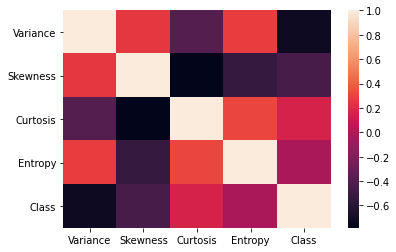

In [6]:
sns.heatmap(df_training.corr())
plt.show()

<Figure size 432x288 with 0 Axes>

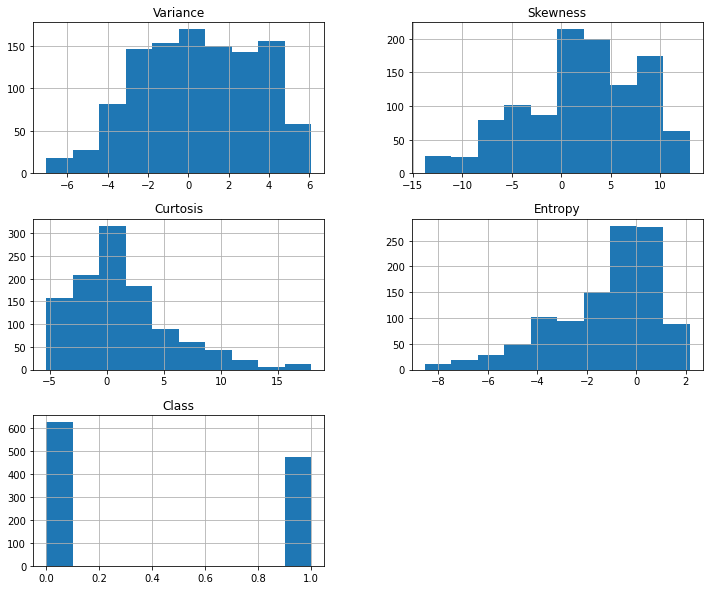

In [7]:
plt.clf()
df_training.hist()
plt.gcf().set_size_inches(12,10)
plt.show()

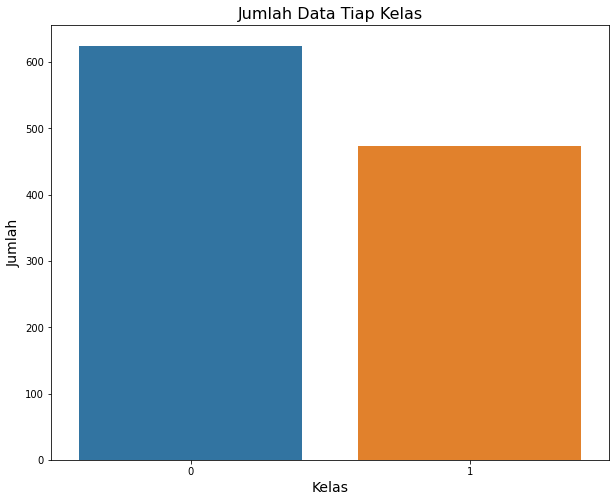

In [8]:
plt.figure(figsize=(10,8))

sns.countplot(x='Class', data=df_training)
plt.xlabel('Kelas', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.title('Jumlah Data Tiap Kelas', fontsize=16)
plt.show()

#### Pembagian fitur dan target

In [9]:
fitur = df_training.drop('Class', axis=1)
target = df_training['Class']

#### Pembagian data latih dan data uji

In [10]:
from sklearn.model_selection import train_test_split

fitur_train, fitur_test, target_train, target_test = train_test_split(fitur, target, test_size=0.25, random_state=50)
print('Jumlah fitur training : ', fitur_train.shape)
print('Jumlah target training : ', target_train.shape)
print('Jumlah fitur test : ', fitur_test.shape)
print('Jumlah target test : ', target_test.shape)

Jumlah fitur training :  (823, 4)
Jumlah target training :  (823,)
Jumlah fitur test :  (275, 4)
Jumlah target test :  (275,)


### Klasifikasi menggunakan Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

bank_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7)
bank_tree = bank_tree.fit(fitur_train, target_train)
y_predict_tree = bank_tree.predict(fitur_test)
y_predict_tree

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

#### Tes akurasi model

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('Akurasi :', accuracy_score(target_test, y_predict_tree))

Akurasi : 0.9745454545454545


#### Simpan model

In [13]:
dump(bank_tree, 'bank_tree.joblib')

['bank_tree.joblib']

### Klasifikasi menggunakan SVM

In [14]:
from sklearn.svm import SVC

bank_svm = SVC(kernel='linear')
bank_svm = bank_svm.fit(fitur_train, target_train)
bank_svm

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
y_pred_svm = bank_svm.predict(fitur_test)
y_pred_svm

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

#### Testing akurasi model

In [16]:
print('Akurasi training', bank_svm.score(fitur_train, target_train))
print('Akurasi testing', bank_svm.score(fitur_test, target_test))

Akurasi training 0.9866342648845686
Akurasi testing 0.9854545454545455


#### Simpan model

In [17]:
dump(bank_svm, 'bank_svm.joblib')

['bank_svm.joblib']